In [1]:
# load data

import json
import pandas as pd


dir = "D:/Work/Data_files/working_dir/"
type = ".json"
in_file_1 = "events_2_expand_msk_04.05"
in_file_2 = "events_2_expand_msk_15.10"

with open(dir + in_file_1 + type, 'r') as inf_1,\
    open(dir + in_file_2 + type, 'r') as inf_2:
    data_1 = json.load(inf_1)
    df_1 = pd.DataFrame(data_1)
    data_2 = json.load(inf_2)
    df_2 = pd.DataFrame(data_2)

FileNotFoundError: [Errno 2] No such file or directory: 'D:/Work/Data_files/working_dir/events_2_expand_msk_04.05.json'

In [2]:
df_1.shape, df_2.shape, df_1.columns

((78841, 22),
 (80153, 22),
 Index(['id', 'publication_date', 'dates', 'title', 'slug', 'place',
        'description', 'body_text', 'location', 'categories', 'tagline',
        'age_restriction', 'price', 'is_free', 'images', 'favorites_count',
        'comments_count', 'site_url', 'short_title', 'tags', 'disable_comments',
        'participants'],
       dtype='object'))

Number of events grows with time.

Is it:
1. More events available in the nearest future?
or
2. New events were added and old are still in ds?

Check - count unique event titels within the df grouped by ID`s.

Next cell shows - new events were added, but old are still in dataframe,
number of unique rows in two df`s equal to this number in last updated df.

In [3]:
titels = pd.concat([df_1, df_2]).groupby('id')['title']
len(titels.nunique())

80153

In [4]:
# df_1 could be dropped, but previously use it to find last added events.
# Find events added for last 5 months:
last_added = df_2.set_index('id').drop(df_1['id'].tolist())
last_added.shape

(1312, 21)

In [5]:
df_1.info(), df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78841 entries, 0 to 78840
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                78841 non-null  int64 
 1   publication_date  78841 non-null  int64 
 2   dates             78841 non-null  object
 3   title             78841 non-null  object
 4   slug              78841 non-null  object
 5   place             63268 non-null  object
 6   description       78841 non-null  object
 7   body_text         78841 non-null  object
 8   location          78841 non-null  object
 9   categories        78841 non-null  object
 10  tagline           78841 non-null  object
 11  age_restriction   66717 non-null  object
 12  price             78841 non-null  object
 13  is_free           78841 non-null  bool  
 14  images            78841 non-null  object
 15  favorites_count   78841 non-null  int64 
 16  comments_count    78841 non-null  int64 
 17  site_url    

(None, None)

In [6]:
df_2.describe()

,id,publication_date,favorites_count,comments_count
count,80153.000000,8.015300e+04,80153.000000,80153.00000
mean,96187.371839,1.453328e+09,5.922910,0.27178
std,58953.264960,5.985553e+07,36.408411,2.36532
min,1.000000,1.351509e+09,0.000000,0.00000
25%,41510.000000,1.400242e+09,0.000000,0.00000
50%,98574.000000,1.447930e+09,0.000000,0.00000
75%,150582.000000,1.492924e+09,2.000000,0.00000
max,189427.000000,1.602685e+09,2520.000000,145.00000


Too less 'comments_count' and 'favourites_count', while they would serve good metric to define cost of the point for route construction algorithm.
Another variants to count cost have to be found.

In [7]:
df_2.describe(include=['bool'])

,is_free,disable_comments
count,80153,80153
unique,2,2
top,False,False
freq,68074,80098


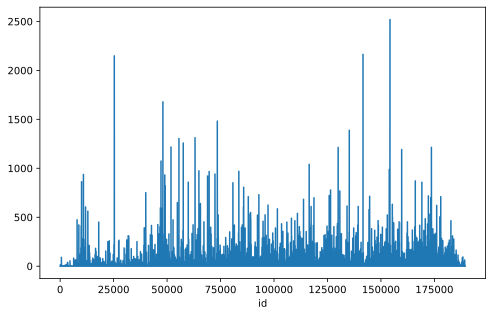

In [8]:
# Could it be that events with first 'id's have greater impact?
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg' 


from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd

df_2.groupby('id')['favorites_count'].sum().plot()

# Probably not, there is no system...

In [9]:
df_2['is_free'].value_counts()

False    68074
True     12079
Name: is_free, dtype: int64

In [10]:
df_2['place'].value_counts()

TypeError: unhashable type: 'dict'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1653, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'dict'


{'id': 10650}    3683
{'id': 359}      2681
{'id': 745}      2533
{'id': 11942}    1833
{'id': 526}      1269
                 ... 
{'id': 32510}       1
{'id': 28733}       1
{'id': 18579}       1
{'id': 11388}       1
{'id': 32525}       1
Name: place, Length: 3758, dtype: int64

In [11]:
df_2['place'].describe()

TypeError: unhashable type: 'dict'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1653, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'dict'


count             63791
unique             3758
top       {'id': 10650}
freq               3683
Name: place, dtype: object

In [12]:
df_2['location'].value_counts()

TypeError: unhashable type: 'dict'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1653, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'dict'


{'slug': 'msk', 'name': 'Moscow', 'timezone': 'GMT+03:00', 'coords': {'lat': 55.753676, 'lon': 37.61989899999998}, 'language': 'ru', 'currency': 'RUB'}    79099
{'slug': 'online', 'name': 'Online', 'timezone': 'GMT+03:00', 'coords': {'lat': None, 'lon': None}, 'language': 'ru', 'currency': 'RUB'}                    1054
Name: location, dtype: int64

Some places provide a lot of events, some do not provide them.
Roughly 1.5% of events are online, and could be acieved from any place with WiFi,
so they could be attended during lunch or in transport.

In [12]:
df_2['categories'].describe(), df_2['categories'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1653, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


(count         80153
 unique          907
 top       [concert]
 freq          28179
 Name: categories, dtype: object,
 [concert]                                                                             28179
 [exhibition]                                                                           7021
 [theater]                                                                              6379
 [stock]                                                                                6159
 [education]                                                                            6151
                                                                                       ...  
 [theater, kids, yarmarki-razvlecheniya-yarmarki, entertainment]                           1
 [kids, concert, holiday, festival, yarmarki-razvlecheniya-yarmarki, entertainment]        1
 [exhibition, education, festival, yarmarki-razvlecheniya-yarmarki, entertainment]         1
 [theater, exhibition, education, cinema, con

1. There are some lists of categories in this field -
use only the first element as main/ parse all of them?
2. Stock, education - new, unique information, could be used in shop and
education tourism, never found such approaches in papers on tour construction.

In [15]:
df_2['participants'].describe(), df_2['participants'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1653, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


(count     80153
 unique     5065
 top          []
 freq      74159
 Name: participants, dtype: object,
 []                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             